![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
print(data.head())
print(data.shape)

            GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   
4                 322          110                  3  3.5   2.5  8.67   
5                 314          103                  2  2.0   3.0  8.21   

            Research  Chance of Admit   
Serial No.                              
1                  1              0.92  
2                  1              0.76  
3                  1              0.72  
4                  1              0.80  
5                  0              0.65  
(500, 8)


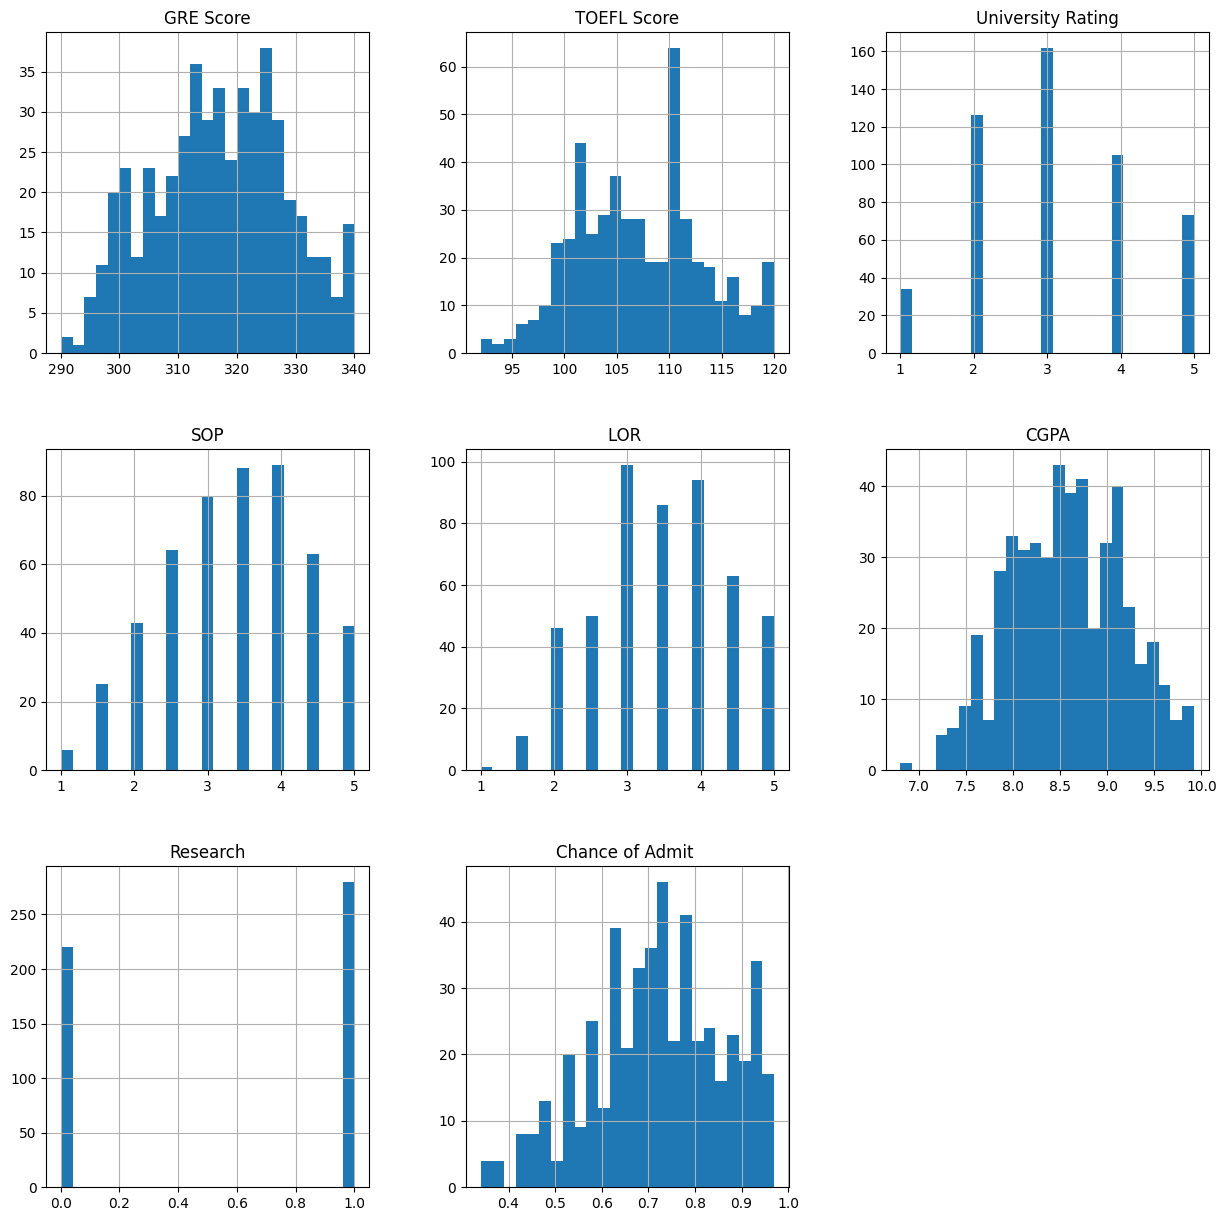

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]] 

In [ ]:
Y = Y.to_frame()

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

#xTrain, xTest, yTrain, yTest


# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [ ]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

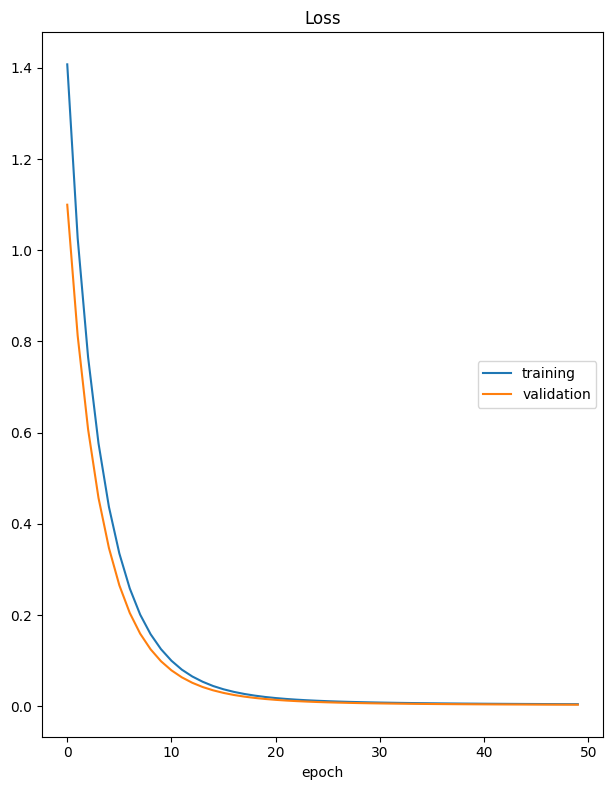

Loss
	training         	 (min:    0.005, max:    1.408, cur:    0.005)
	validation       	 (min:    0.004, max:    1.100, cur:    0.004)
11/11 [==============================] - 0s 41ms/step - loss: 0.0049 - val_loss: 0.0038


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

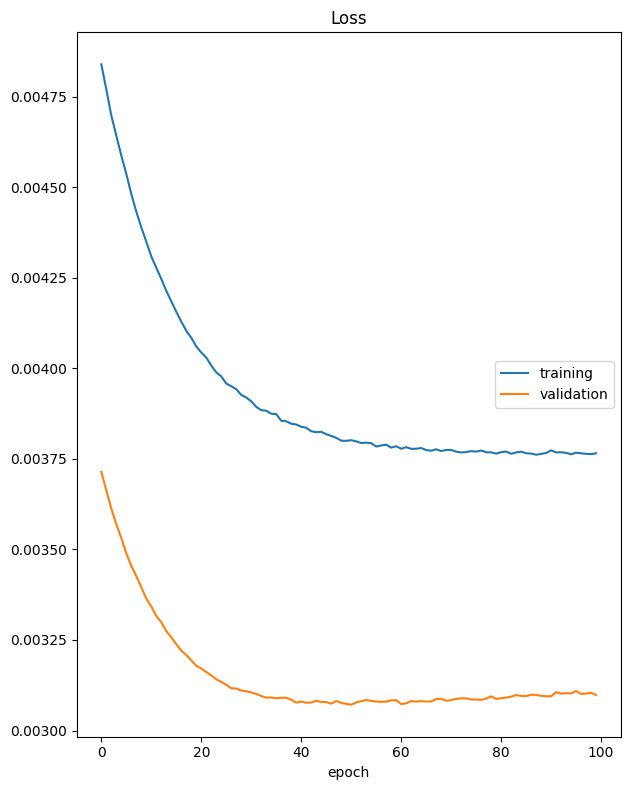

Loss
	training         	 (min:    0.004, max:    0.005, cur:    0.004)
	validation       	 (min:    0.003, max:    0.004, cur:    0.003)
11/11 [==============================] - 0s 40ms/step - loss: 0.0038 - val_loss: 0.0031


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [ ]:
# Evaluar el modelo en el set de test
predictions = model.predict(X_test)
predictions = np.round(predictions).flatten()

# Calcular las métricas de desempeño (MAE y MSE)
mae = np.mean(np.abs(predictions - Y_test))
mse = np.mean((predictions - Y_test)**2)
mse1 = mse
print("MAE: {:.4f}".format(mae))
print("MSE: {:.4f}".format(mse))


5/5 [==============================] - 0s 3ms/step
MAE: 0.3118
MSE: 0.1274


Para poder generar un modelo que nos ayude a predecir la probalidad que tiene los estudiantes de ser admitidos,  como primera medida se realizo la elaboracion de un modelo de red neuronal con una sola capa haciendo uso de la función Sequential(), para ello, se hace la normalizacion de las variables predictoras (X) con la función StandardScaler y se transforman los conjuntos de entrenamiento y prueba.
Como segunda fase de la elaboracion del modelo, se determinó en una primera instancia que el modelo se entrenaría con 50 épocas y se añadió un parámetro de graficación por época con el fin de observar el comportamiento en cada una de ellas. Gracias a la graficacion, pudimos observar que al nive de las 50 epocas tanto el set de validacion como de entrenamiento si bien seguian bajando a un ritmo constante, la divergencia entre las dos lineas no se habia estabilizado, por lo que se decidio correr nuevamente modelo en una segunda instancia con 100 epocas, que en conculusion nos mostro que la convegencia y estabilizacion de la grafica entre los dos sets se dio a el nivel aproximado de 60 a 70 epocas.

Adicionalmente, como optimizador del modelo se utilizo Stochastic Gradient Descent, dada su eficiencia computacional y adaptabilidad a conjuntos de datos grandes, ya que utiliza solo una muestra (lote o mini-lote) de datos en cada paso. Por su parte, se decidió optimizar el MSE, ya que es una métrica de desempeño común en los modelos de regresión, también se decidió usar la función de activación sigmoide ya que esta está en los rangos de 0 y 1, como estamos calculando porcentajes, es más apropiado usar esta.
Finalmente, se evaluó el desempeño del modelo en el conjunto de datos de validación mediante las métricas de error absoluto medio y error cuadrático medio, y se obtuvo un MAE de 0.3118 y un MSE de 0.1274.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')


1  output variables


In [ ]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')


7 input variables


In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(64, input_shape=(dims,),activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(output_var))
model.add(Activation('sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')


In [ ]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)


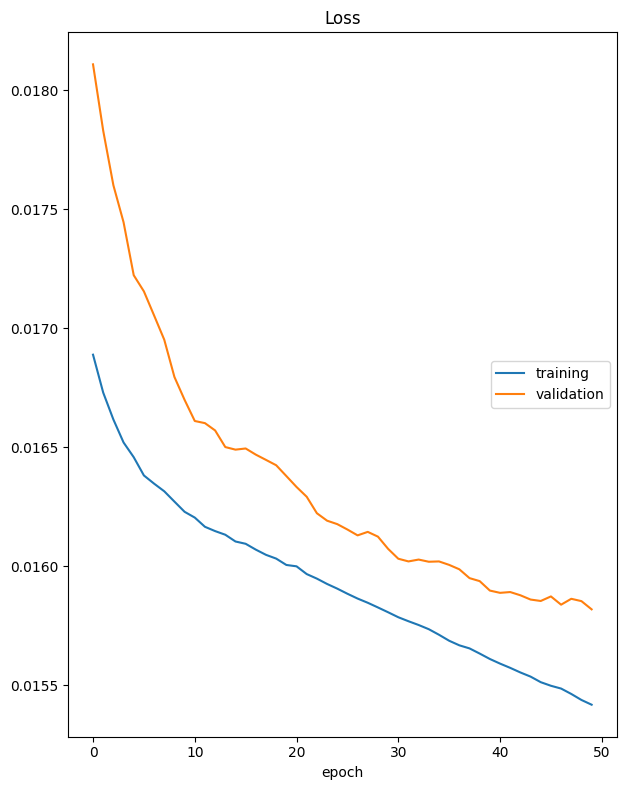

Loss
	training         	 (min:    0.015, max:    0.017, cur:    0.015)
	validation       	 (min:    0.016, max:    0.018, cur:    0.016)
10/10 [==============================] - 0s 40ms/step - loss: 0.0154 - val_loss: 0.0158


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])


In [ ]:
# Evaluar el modelo en el set de test
predictions = model.predict(X_test)
predictions = np.round(predictions).flatten()

# Calcular las métricas de desempeño (MAE y MSE)
mae = np.mean(np.abs(predictions - Y_test))
mse = np.mean((predictions - Y_test)**2)
mse2 = mse
print("MAE: {:.4f}".format(mae))
print("MSE: {:.4f}".format(mse))


5/5 [==============================] - 0s 4ms/step
MAE: 0.2893
MSE: 0.1049


Con el fin de predecir la probabilidad de admisión de los estudiantes, se modela ahora la red neuronal con dos capas haciendo uso de la función Sequential(). Como primer paso, se normalizan las variables predictoras (X) con la función StandardScaler y se transforman los conjuntos de entrenamiento y prueba.
Luego, se determinó que el modelo se entrenaría con 50 épocas y se añadió un parámetro de graficación por época con el fin de observar el comportamiento en cada una de ellas.
Adicionalmente, se determinó el tamaño de las capas en 64 neuronas, dado el tamaño del conjunto de datos, y se observó que con una mayor cantidad de neuronas las métricas de desempeño empeoraban. Asimismo, se hizo uso del optimizador Stochastic Gradient Descent, dada su eficiencia computacional y adaptabilidad a conjuntos de datos grandes, ya que utiliza solo una muestra (lote o mini-lote) de datos en cada paso. Por su parte, se decidió optimizar el MSE, ya que es una métrica de desempeño común en los modelos de regresión, también se decidió usar la función de activación sigmoide ya que esta está en los rangos de 0 y 1, como estamos calculando porcentajes, es más apropiado usar esta.
Finalmente, se evaluó el desempeño del modelo en el conjunto de datos de validación mediante las métricas de error absoluto medio y error cuadrático medio, y se obtuvo un MAE de 0.2893 y un MSE de 0.1049.


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

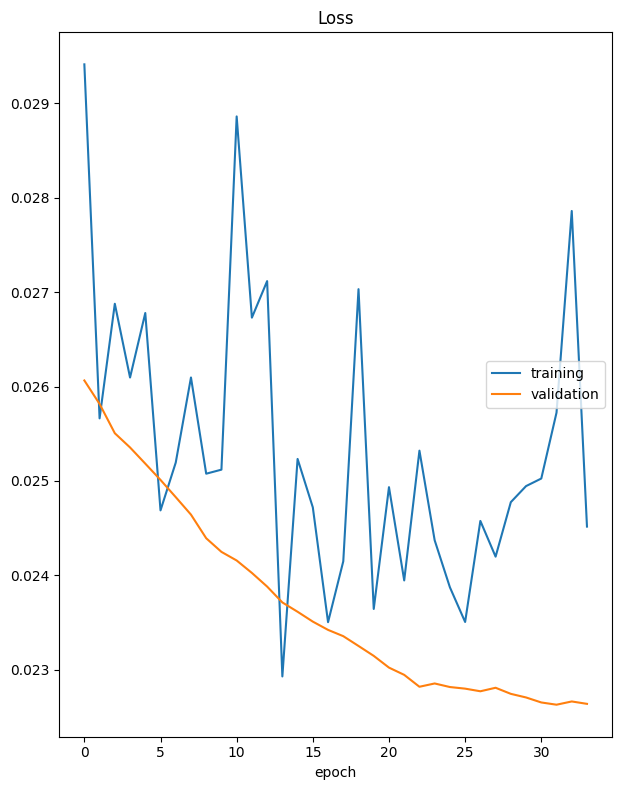

Loss
	training         	 (min:    0.023, max:    0.029, cur:    0.025)
	validation       	 (min:    0.023, max:    0.026, cur:    0.023)
3/3 [==============================] - 0s 204ms/step - loss: 0.0245 - val_loss: 0.0226
Epoch 34: early stopping


In [ ]:
# Celda 3

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(64, input_shape=(dims,),activation='sigmoid')) #  capa inicial:recibe "input de dims" y genera una capa de 64 con activación tipo "sigmoid"
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid')) #capa oculta: tamaño 64
model.add(Dropout(0.2))
model.add(Dense(output_var)) # capa de salida: tamaño "output var".
model.add(Activation('sigmoid'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

# Entrenar el modelo
history = model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=200, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop, PlotLossesKeras()])


In [ ]:
# Evaluar el modelo en el set de test
predictions = model.predict(X_test)
predictions = np.round(predictions).flatten()

# Calcular las métricas de desempeño (MAE y MSE)
Y_test = Y_test.values
mae = np.mean(np.abs(predictions - Y_test))
mse = np.mean((predictions - Y_test)**2)
mse3 = mse
print("MAE: {:.4f}".format(mae))
print("MSE: {:.4f}".format(mse))

5/5 [==============================] - 0s 3ms/step
MAE: 0.2893
MSE: 0.1049


Con el fin de predecir la probabilidad de admisión de los estudiantes, se modela ahora la red neuronal con dos capas haciendo uso de la función dropout, la cual es una técnica de regularización que ayuda a evitar el overfitting o sobreajuste, ignorando algunas neuronas aleatoriamente durante el entrenamiento, de forma que la red no puede memorizar esos canales. En este caso, se establece un valor de 0.2, lo que significa que el 20% de las salidas de la capa anterior serán ignoradas. Adicionalmente, se incluye la función de early stopping, con el objetivo de detener el entrenamiento una vez la perdida en validación no cambie, en este caso durante dos épocas/periodos consecutivos. 

En este modelo se determinó entrenarlo con 200 épocas para poder observar la función early stopping en acción, y esta detuvo el entrenamiento en la época 53, cuando la perdida en validación fue igual durante 2 épocas. 
Adicionalmente, se determina el tamaño de las capas en 64 neuronas, dado el tamaño del set de datos y se observó que con una mayor cantidad de neuronas las métricas de desempeño desmejoraban. Para la función de activación, se hizo uso de la función sigmoidal, la cual produce valores en el rango de 0 a 1, lo que la hace pertinente para este problema donde se busca una salida de probabilidad. Así mismo, se hizo uso del optimizador Stochastic Gradient Descent, dada su eficiencia computacional y adaptabilidad a conjuntos de datos grandes, pues utiliza solo una muestra (lote o mini-lote) de datos en cada paso. Por su parte, se determina optimizar el MSE, pues es una métrica de desempeño de los modelos de regresión. 

Finalmente, se evalúa el desempeño del modelo en el set de datos de validación mediante las métricas de error absoluto medio y error cuadrático medio, y se obtiene un MAE de 0.2893 y un MSE de 0.1049.


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

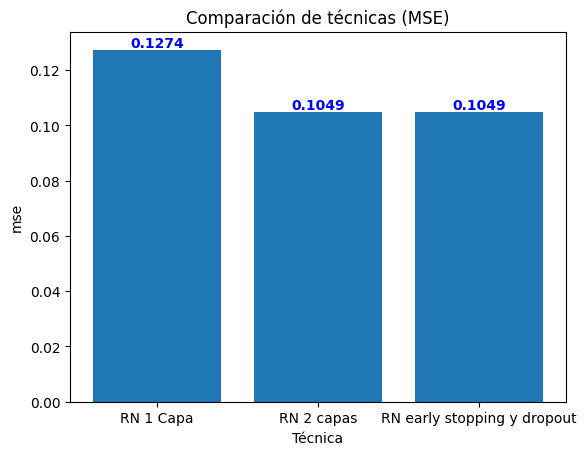

In [ ]:
# Celda 4
import matplotlib.pyplot as plt

# Datos de la gráfica
tecnicas = ['RN 1 Capa', 'RN 2 capas', 'RN early stopping y dropout']
mse = [mse1, mse2,mse3]

# Crear la gráfica de barras
plt.bar(tecnicas, mse)

# Personalizar la gráfica
plt.title('Comparación de técnicas (MSE)')
plt.xlabel('Técnica')
plt.ylabel('mse')


for i, v in enumerate(mse):
    plt.text(i, v + 0.001, f'{v:.4f}', color='blue', fontweight='bold', ha='center')

# Mostrar la gráfica
plt.show()

De acuerdo a los resultados obtenidos de las diferentes redes, podemos observar los siguientes desempeños:

Red neuronal de una capa:
- MAE: 0.3118
- MSE: 0.1274

Red neuronal con dos capas:
- MAE: 0.2893
- MSE: 0.1049

Red neuronal con más de una capa usando early stopping y dropout:
- MAE: 0.2893
- MSE: 0.1049

con base a los resultados obtenidos, el mejor desempeño se obtiene con la red neuronal de dos capas y la red neuronal con más de una capa usando early stopping y dropout, ya que ambas tienen valores más bajos tanto de MSE como de MAE en comparación con la red neuronal de una capa.

Ventajas del mejor modelo (red neuronal con dos capas y red neuronal con más de una capa usando early stopping y dropout):

- Mayor precisión: Estos modelos logran una mayor precisión en términos de MAE y MSE, lo que indica que están más cerca de las predicciones reales. Esto es beneficioso para la predicción de la probabilidad de admisión de los estudiantes, ya que se obtienen estimaciones más precisas.

- Al tener más capas, estos modelos son capaces de aprender relaciones más complejas y extraer características más significativas de los datos. Esto les permite capturar patrones más sutiles y mejorar su capacidad de generalización.

Desventajas del modelo con el menor desempeño (red neuronal de una capa):

- Este modelo muestra un desempeño ligeramente inferior en términos de MAE y MSE en comparación con los otros modelos. Esto implica que las predicciones pueden estar más alejadas de los valores reales, lo que puede afectar la precisión de las estimaciones de probabilidad de admisión.

- Al tener solo una capa, este modelo puede tener limitaciones en su capacidad para aprender relaciones complejas y capturar todas las características importantes presentes en los datos. Como resultado, puede tener dificultades para realizar predicciones precisas y su capacidad de generalización puede verse comprometida.

En resumen, los modelos con dos capas y más de una capa utilizando early stopping y dropout son más adecuados para el problema de predicción de probabilidad de admisión en comparación con la red neuronal de una sola capa. Estos modelos ofrecen una mayor precisión y capacidad de aprendizaje, lo que los convierte en opciones más favorables para este conjunto de datos específico.